# Logistic Regression example

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
df = pd.read_csv('titanic_train.csv')
df.head(10)       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


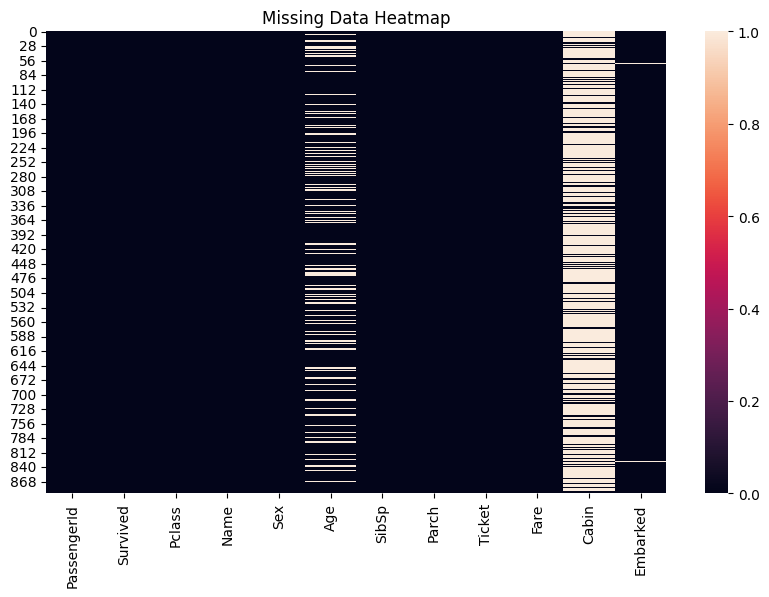

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.title("Missing Data Heatmap")
plt.show()
#what is yticklabels
print(df.isnull().sum())

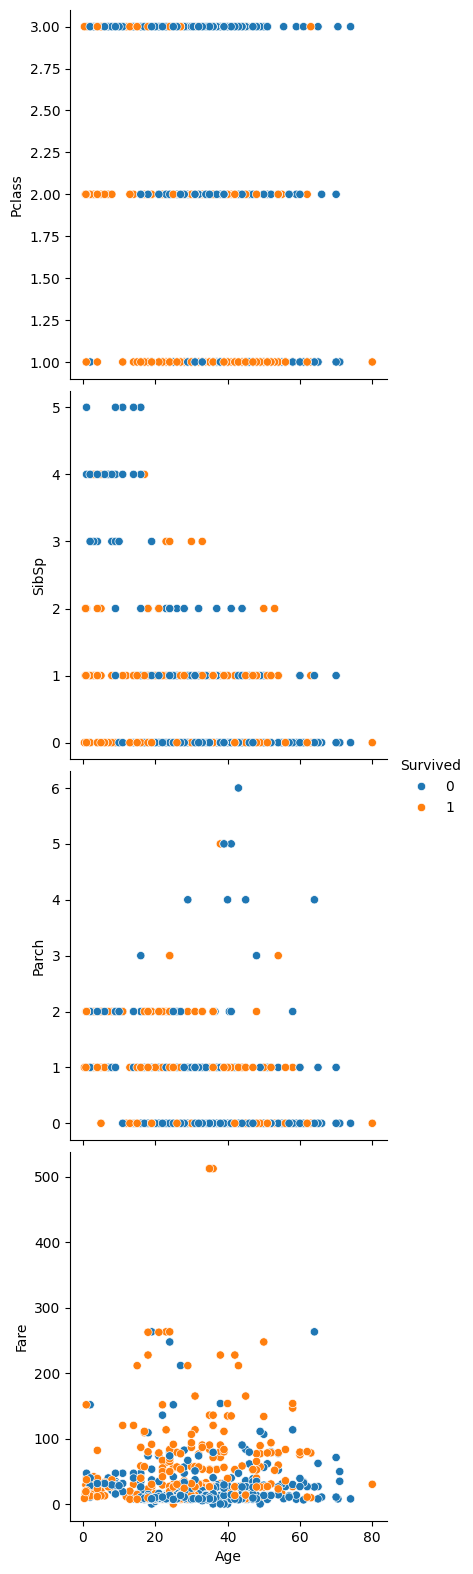

In [91]:
#using sns to find relation between age and other variables
sns.pairplot(data=df, x_vars=['Age'], y_vars=['Pclass', 'SibSp', 'Parch', 'Fare'], hue='Survived', height=4)


C:\Users\mepra\AppData\Local\Temp\ipykernel_1428\2924116254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

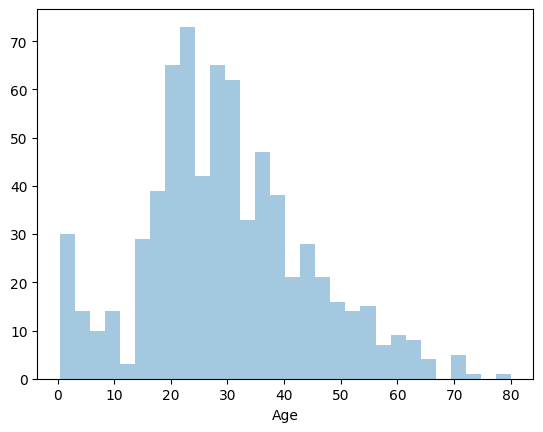

In [98]:
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

In [108]:
#find average age of each class
mean_age = df.groupby('Pclass')['Age'].mean()
#convert float to int
mean_age = mean_age.astype(int)
print(mean_age)


Pclass
1    38
2    29
3    25
Name: Age, dtype: int64


In [109]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    return Age
    
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\mepra\AppData\Local\Temp\ipykernel_1428\140715447.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0]
C:\Users\mepra\AppData\Local\Temp\ipykernel_1428\140715447.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


In [118]:
type(df['Embarked'].mode()[0])

str

In [119]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

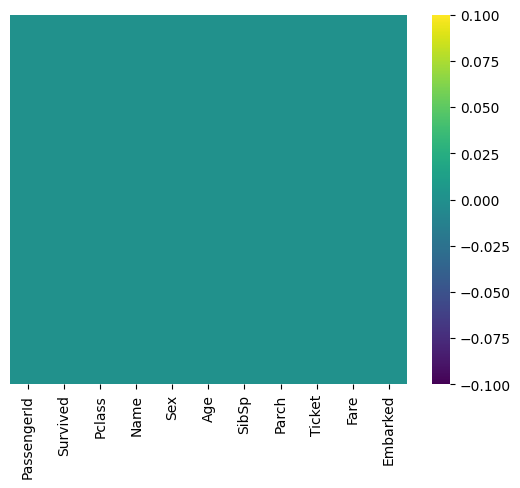

In [120]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [111]:
df.drop('Cabin', axis=1, inplace=True)


In [121]:
# 4. Encoding Categorical Features
# drop_first=True prevents Multicollinearity (Dummy Variable Trap)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [124]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [ ]:


# 5. Drop original text columns and unused ID columns
# Note: Adjust drop list based on your specific CSV columns
df.drop([ 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# 6. Concatenate new numerical columns
df = pd.concat([df, embarked], axis=1)



In [126]:
df.drop(['Q'], axis=1, inplace=True)

In [128]:
#rename S to Embarked
df.rename(columns={'S': 'Embarked'}, inplace=True)

In [129]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,True
1,1,1,0,38.0,1,0,71.2833,False
2,1,3,0,26.0,0,0,7.9250,True
3,1,1,0,35.0,1,0,53.1000,True
4,0,3,1,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,True
887,1,1,0,19.0,0,0,30.0000,True
888,0,3,0,24.0,1,2,23.4500,True
889,1,1,1,26.0,0,0,30.0000,False


# BUILDING LOGISTIC REGRESSION MODEL

In [ ]:
# X = Features, y = Target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Model Initialization & Training
# increased max_iter to ensure convergence
logmodel = LogisticRegression(max_iter=1000) 
logmodel.fit(X_train, y_train)

# Prediction
predictions = logmodel.predict(X_test)


(331    0
 700    1
 748    0
 751    1
 481    0
       ..
 388    0
 416    1
 407    1
 482    0
 829    1
 Name: Survived, Length: 268, dtype: int64,
 array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 

In [133]:
print("--- Classification Report ---")
print(classification_report(y_test, predictions))

print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, predictions))

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

--- Confusion Matrix ---
[[134  20]
 [ 38  76]]
